# Lab | Customer Analysis Final Round

## 01 - Problem (case study)

### Data Description

Data provided in a csv table with the following features:

* Number of rows: 9134
* Number of columns: 24 <br>
<br>
* Number of numerical variables: 8
* Numbre of categorical/non-numerical variables: 16

### Goal

The objective of this data is to understand customer demographics and buying behavior. We will use predictive analytics to analyze the most profitable customers using their total claim amount as the dependent variable.

## 02 - Getting Data and Preparing Notebook

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
# To make run all you ask in one cell, not only the last required
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [22]:
# Open file and show shape 
data=pd.read_csv('C:/Student/IRONHACK/Week1/D5_MachineLearning/Labs/lab-customer-analysis-final-round/files_for_lab/csv_files/marketing_customer_analysis.csv')
data.shape

numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object)
numerical.shape
categorical.shape
data.head(2)

(9134, 24)

(9134, 8)

(9134, 16)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


## 03 - Cleaning/Wrangling/EDA

In [23]:
# Change header names.
# data1.columns = map(str.lower, data1.columns)
data.rename(columns = {'Customer Lifetime Value': 'CLV', 'Total Claim Amount': 'TCA'}, inplace = True)
data.head(10)

,Customer,State,CLV,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,TCA,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
5,OC83172,Oregon,8256.297800,Yes,Basic,Bachelor,1/25/11,Employed,F,62902,...,94,0,2,Personal Auto,Personal L3,Offer2,Web,159.383042,Two-Door Car,Medsize
6,XZ87318,Oregon,5380.898636,Yes,Basic,College,2/24/11,Employed,F,55350,...,13,0,9,Corporate Auto,Corporate L3,Offer1,Agent,321.600000,Four-Door Car,Medsize
7,CF85061,Arizona,7216.100311,No,Premium,Master,1/18/11,Unemployed,M,0,...,68,0,4,Corporate Auto,Corporate L3,Offer1,Agent,363.029680,Four-Door Car,Medsize
8,DY87989,Oregon,24127.504020,Yes,Basic,Bachelor,1/26/11,Medical Leave,M,14072,...,3,0,2,Corporate Auto,Corporate L3,Offer1,Agent,511.200000,Four-Door Car,Medsize
9,BQ94931,Oregon,7388.178085,No,Extended,College,2/17/11,Employed,F,28812,...,7,0,8,Special Auto,Special L2,Offer2,Branch,425.527834,Four-Door Car,Medsize


In [24]:
# Deal with NaN values. --> There are 0 NaN values
data.isnull().sum().sum()
count_nan_in_df = data.isnull().sum()
count_nan_in_df

# Categorical and numerical features. --> 8 numerical variables and 16 categorical
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object)
numerical.shape
categorical.shape

0

Customer                         0
State                            0
CLV                              0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
TCA                              0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

(9134, 8)

(9134, 16)

In [25]:
# Exploration.
data.describe(include=[np.number])
data.describe(include=[np.object])

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,TCA
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,QX57337,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


<blockquote><b>Main conclusions from our preliminary analysis</b>
    
* On average, the total claim amount (TCA) per customer is 434 US dollars.
* The most frequent state among customers is California
* 75% of the customers have an income below 62,320 US dollars and have not presented any money claim in almost two years
* Approximately 2/3 of the customers own a medium size vehicle and have a policy for their personal vehicle

<AxesSubplot:>

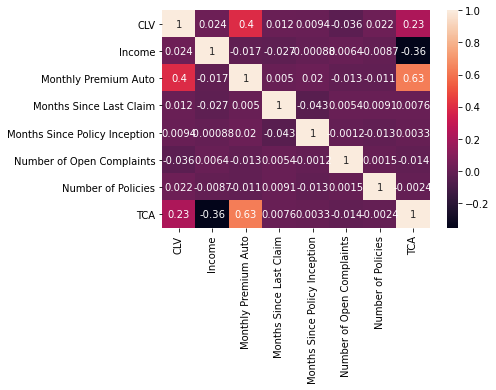

In [26]:
corr_matrix = numerical.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<blockquote><b>The most obvious correlation in our numerical data is shown between the variables Total Claim Amount (TCA) and Monthly Premium Auto.</b>
    This leads us to think that the higher the Monthly Payment is, the higher the amount claimed by a customer will be. Other variables that show some kind of correlation are Customer Lifetime Value (CLA) with positive correlation of 23%, and Income (negative correlation of -36%). </blockquote>

## 04 - Processing Data

There is a huge difference between the maximum value and the value representing 75% of the customers for Customer Lifetime Value. We will inspect this variable and remove the outliers in order to obtain a more normal distribution of the values 

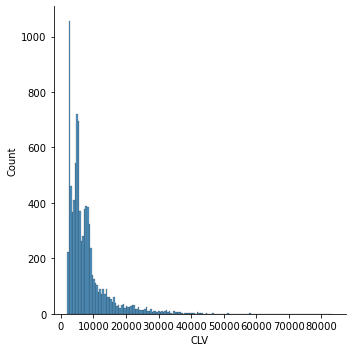

<AxesSubplot:xlabel='CLV'>

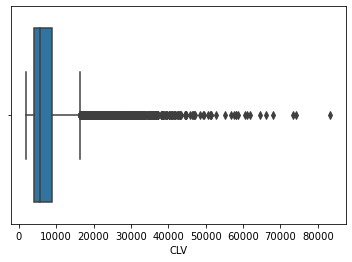

In [27]:
# Dealing with outliers.
sns.displot(data['CLV'])
plt.show()
sns.boxplot(x=data['CLV'])
plt.show()

8317

(8317, 24)

6279.177891973307

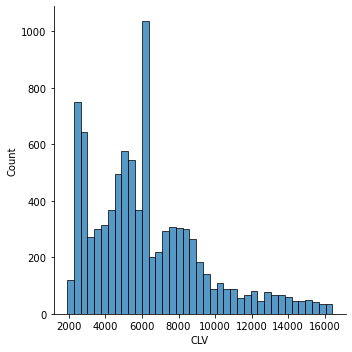

<AxesSubplot:xlabel='CLV'>

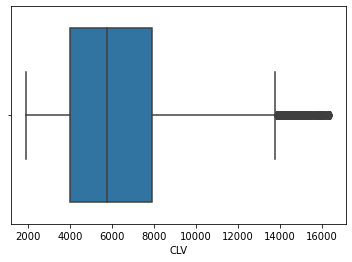

In [28]:
iqr = np.percentile(data['CLV'],75) - np.percentile(data['CLV'],25)
upper_limit = np.percentile(data['CLV'],75) + 1.5*iqr
lower_limit = np.percentile(data['CLV'],25) - 1.5*iqr

# We locate the outliers
lenghtValues=len(data[(data['CLV']>lower_limit) & (data['CLV']<upper_limit)])  # number of such observations.
lenghtValues

dataCLV = data.loc[(data['CLV'] > lower_limit) & (data['CLV'] < upper_limit)]
dataCLV.shape

# # Now we calculate mean of the column, excluding the outliers
mean = np.sum(dataCLV['CLV'])/lenghtValues
mean

# # Finally, we replace the outliers with the mean of the values that actually within the confidence interval
def replace_outliers_with_mean(x):
    if x < lower_limit:
        return mean
    elif x > upper_limit:
        return mean
    else:
        return x
    
data['CLV'] = list(map(replace_outliers_with_mean,data['CLV']))

# # The result is a more balanced distribution of the variable
sns.displot(data['CLV'])
plt.show()
sns.boxplot(x=data['CLV'])
plt.show()

#### x,y split

In [29]:
data.shape
# identify numerical variables
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(np.object)
#separate the features from the labels
y_num = numerical['TCA']
X_num = numerical.drop(['TCA'], axis=1)

(9134, 24)

#### Normalize (numerical)

In [30]:
# Normalization
MinMaxtransformer = MinMaxScaler().fit(X_num)
x_normalized = MinMaxtransformer.transform(X_num)
print(x_normalized.shape)
x_normalized = pd.DataFrame(x_normalized,columns=X_num.columns)
x_normalized.head()

(9134, 7)


,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.059651,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.350217,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.757387,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.396140,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.063109,0.438443,0.050633,0.342857,0.444444,0.0,0.000


#### One Hot/Label Encoding (categorical).

In [31]:
# Encoding Categorical Data.
# Add the two categorical variables that might have the most influence in predicting the Total Claim Amount (TCA)
X_cat = data[['Coverage','State']]
#One Hot Encoding 
encoder = OneHotEncoder().fit(X_cat)
X_cat_encoded = encoder.transform(X_cat).toarray()
enc = [columname for sublist in encoder.categories_ for columname in sublist]
onehot_encoded = pd.DataFrame(X_cat_encoded,columns=enc)
onehot_encoded.head()

,Basic,Extended,Premium,Arizona,California,Nevada,Oregon,Washington
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [32]:
# Concatenate tables
x_normalized.shape
onehot_encoded.shape
X = pd.concat([x_normalized, onehot_encoded],axis=1)
y = y_num
X.head(2)

(9134, 7)

(9134, 8)

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Basic,Extended,Premium,Arizona,California,Nevada,Oregon,Washington
0,0.059651,0.562847,0.033755,0.914286,0.050505,0.0,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.350217,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Train, test split

In [33]:
# Splitting into train set and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X_train.head()

,CLV,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Basic,Extended,Premium,Arizona,California,Nevada,Oregon,Washington
3774,0.347415,0.531431,0.126582,0.314286,0.060606,0.0,1.000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3441,0.038359,0.000000,0.046414,0.714286,0.040404,0.0,0.000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3560,0.138714,0.587242,0.156118,0.228571,0.040404,0.0,0.000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
6034,0.326770,0.726748,0.092827,0.485714,0.212121,0.2,0.375,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
8904,0.315796,0.188236,0.143460,0.085714,0.515152,0.8,0.875,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


## 05 - Modeling

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#we train/fit our model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

(6850, 15)
(2284, 15)
(6850,)
(2284,)


## 06 - Model Validation

In [35]:
predictions = lm.predict(X_test)

In [36]:
# R2.
r2 = r2_score(y_test, predictions)
print(r2)
# MSE.
mse = mean_squared_error(y_test, predictions)
# RMSE.
rmse = math.sqrt(mse)


0.48698978251471126


## 07 - Reporting

Our model can predict the Total Claimed Amount (TCA) at about 48%. This level of accuracy is not high enought to put it into production. It will be necessary to find another variables that can help us improve it. 